# Visualization of Survey Papers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

# Set plotting styles
colors = ['C' + str(i) for i in range(0, 10)]
mpl.style.use('seaborn-deep')

# Load data
refs = pd.read_csv("references.csv", encoding="utf-8")

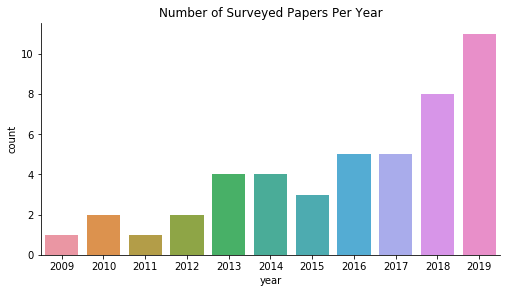

In [2]:
sns.catplot(data=refs, x="year", kind="count", height=4, aspect=1.75)
plt.title("Number of Surveyed Papers Per Year")
plt.savefig("fig/paper_year.pdf", bbox_inches="tight")
plt.show()

In [3]:
types = refs["type"].value_counts()
types

empirical                21
technical                17
tool                      4
technical + empirical     4
Name: type, dtype: int64

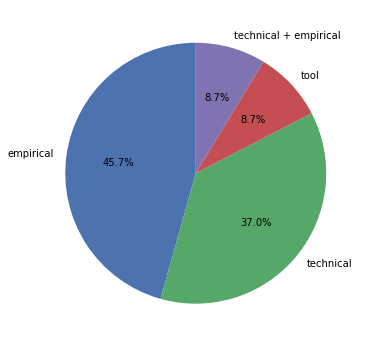

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(types, labels=types.index, startangle=90, autopct='%1.1f%%')
plt.savefig("fig/paper_type.pdf", bbox_inches="tight")
fig.show()

In [5]:
confs = refs["source"].value_counts()
print(confs)

SANER     8
MSR       6
ICSME     6
ICSE      4
ASE       4
FSE       4
EMSE      2
Arxiv     2
OOPSLA    1
JIST      1
ICPC      1
CASCON    1
SLE       1
JSEP      1
ICJAI     1
TOSEM     1
JSS       1
TSE       1
Name: source, dtype: int64


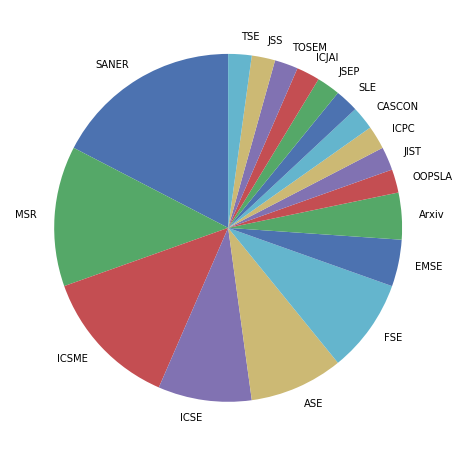

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(confs, labels=confs.index, startangle=90)
plt.savefig("fig/paper_conf.pdf", bbox_inches="tight")
fig.show()

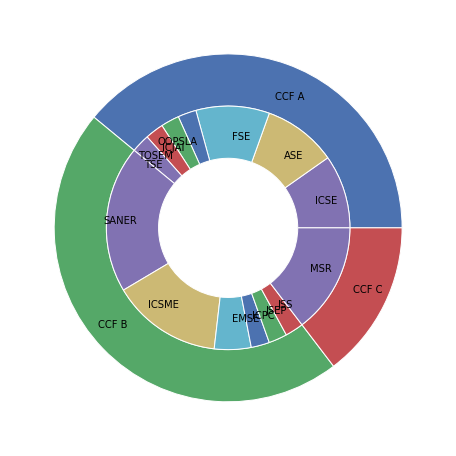

In [7]:
ccf_a = ["FSE", "ICSE", "OOPSLA", "TSE", "ASE", "TOSEM", "ICJAI"]
ccf_b = ["SANER", "ICSME", "EMSE", "JSEP", "JSS", "ICPC", "ESEM"]
ccf_c = ["MSR"]
data_outer = [0, 0, 0]
data_inner = [[], [], []]
label_outer = ["CCF A", "CCF B", "CCF C"]
label_inner = [[], [], []]
for name, count in confs.iteritems():
    if name in ccf_a:
        data_outer[0] += count
        data_inner[0].append(count)
        label_inner[0].append(name)
    elif name in ccf_b:
        data_outer[1] += count
        data_inner[1].append(count)
        label_inner[1].append(name)
    elif name in ccf_c:
        data_outer[2] += count
        data_inner[2].append(count)
        label_inner[2].append(name)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(data_outer, radius=1, colors=colors, 
       labels=label_outer, labeldistance=0.8,
       wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(sum(data_inner, []), radius=0.7, colors=colors[3:], 
       labels=sum(label_inner, []), labeldistance=0.75,
       wedgeprops=dict(width=0.3, edgecolor='w'))
plt.savefig("fig/paper_conf_rank.pdf", bbox_inches="tight")
fig.show()

In [8]:
domain_names = []
for domain in refs["domain"]:
    domain_names.extend([s.strip() for s in domain.split(",")])
domain_names = list(set(domain_names))
domain_counts = []
for s in domain_names:
    count = 0
    for d in refs["domain"]:
        if s in d:
            count += 1
    domain_counts.append(count)
domain = pd.Series(domain_counts, index=domain_names).sort_values(ascending=False)
domain

Library Migration         15
API Mapping               10
Language Migration         9
Dependency Management      8
Library Upgrade            7
Library Recommendation     6
Type Migration             1
dtype: int64

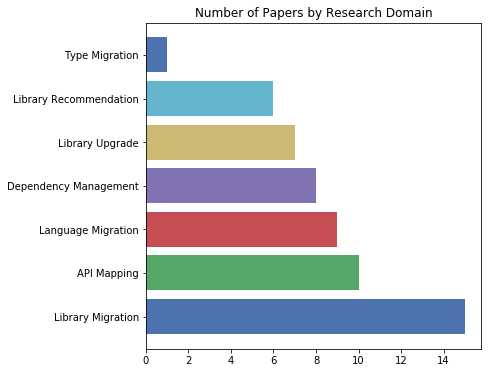

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(y=[i for i in range(0, len(domain))], width=domain, tick_label=domain.index, color=colors)
plt.savefig("fig/paper_domain.pdf", bbox_inches="tight")
plt.title("Number of Papers by Research Domain")
fig.show()